# Notebook DJPartner

### Importando as Bibliotecas

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

### Importando o .csv e alterando o necessário

In [147]:
filename = 'vintage_culture (vintage culture @ thunder machine, vintage is a festival, belo horizonte, brazil) 60'
dataframe = pd.read_csv(f'../artists/{filename}.csv')
dataframe = dataframe.sort_values(by='Playlists Plays', ascending=False)
dataframe = dataframe.reset_index(drop=True)
dataframe = dataframe[dataframe['Track Position'] != 'w/']
display(dataframe.head(5))

,Artista,Nome,Label,Playlists Plays,Track Position,Remix
0,Jamie Jones,My Paradise,DEFECTED,315.0,39,Vintage Culture Remix
1,Andrew Meller,Born Slippy,GLASGOW UNDERGROUND,237.0,29,NaN
2,ANOTR & Abel Balder,Relax My Eyes,NO ART,230.0,28,NaN
3,Röyksopp,Sordid Affair,DOG TRIUMPH,225.0,42,Maceo Plex Remix
4,Binary Finary,1998,ARMADA,121.0,34,Victor Ruiz Remix


### Dropando o que for NaN em 'Playlist Plays' ; 'Nome' ; 'Artista'

In [148]:
dataframe.dropna(subset=['Playlists Plays', 'Artista', 'Nome'], inplace=True)
dataframe = dataframe.reset_index(drop=True)
display(dataframe.head(8))
shape = dataframe.shape
print(f'Foram identificadas {shape[0]} tracks!')

,Artista,Nome,Label,Playlists Plays,Track Position,Remix
0,Jamie Jones,My Paradise,DEFECTED,315.0,39,Vintage Culture Remix
1,Andrew Meller,Born Slippy,GLASGOW UNDERGROUND,237.0,29,NaN
2,ANOTR & Abel Balder,Relax My Eyes,NO ART,230.0,28,NaN
3,Röyksopp,Sordid Affair,DOG TRIUMPH,225.0,42,Maceo Plex Remix
4,Binary Finary,1998,ARMADA,121.0,34,Victor Ruiz Remix
5,Pryda,Animal,PRYDA,112.0,47,NaN
6,Capricorn,20Hz,R&S,112.0,30,Marco Lys Remix
7,RÜFÜS DU SOL,Like An Animal,SWEAT IT OUT!,107.0,36,Yotto Remix


Foram identificadas 48 tracks!


### Adicionando 'Lista Artistas'

In [149]:
# Dividindo a coluna 'Artista' em uma lista de artistas
dataframe['Artistas Originais'] = dataframe['Artista'].apply(lambda x: re.split(r' & | vs. | ft. | feat | feat. | X | x ', x))

# Removendo as palavras reservadas da coluna 'Remix'
dataframe['Artistas Remix'] = dataframe['Remix'].str.replace(r'\s*(Remix|Mix|Mashup|Edit|Bootleg)\s*$', '', regex=True)

# Tratando valores nulos na coluna 'Artistas Remix'
dataframe['Artistas Remix'] = dataframe['Artistas Remix'].apply(lambda x: [] if pd.isna(x) else re.split(r' & | vs. | ft. | feat | feat. | X | x ', x))

# Criando a coluna 'Lista Artistas' com a combinação de 'Artistas Originais' e 'Artistas Remix'
dataframe['Lista Artistas'] = dataframe.apply(lambda row: [item for sublist in [row['Artistas Originais'], row['Artistas Remix']] if isinstance(sublist, list) for item in sublist], axis=1)

# Exibindo o DataFrame com as colunas adicionadas
dataframe = dataframe[['Artista', 'Artistas Originais', 'Remix', 'Artistas Remix', 'Lista Artistas', 'Nome', 'Label', 'Playlists Plays', 'Track Position']]
display(dataframe.head(10))


,Artista,Artistas Originais,Remix,Artistas Remix,Lista Artistas,Nome,Label,Playlists Plays,Track Position
0,Jamie Jones,[Jamie Jones],Vintage Culture Remix,[Vintage Culture],"[Jamie Jones, Vintage Culture]",My Paradise,DEFECTED,315.0,39
1,Andrew Meller,[Andrew Meller],NaN,[],[Andrew Meller],Born Slippy,GLASGOW UNDERGROUND,237.0,29
2,ANOTR & Abel Balder,"[ANOTR, Abel Balder]",NaN,[],"[ANOTR, Abel Balder]",Relax My Eyes,NO ART,230.0,28
3,Röyksopp,[Röyksopp],Maceo Plex Remix,[Maceo Plex],"[Röyksopp, Maceo Plex]",Sordid Affair,DOG TRIUMPH,225.0,42
4,Binary Finary,[Binary Finary],Victor Ruiz Remix,[Victor Ruiz],"[Binary Finary, Victor Ruiz]",1998,ARMADA,121.0,34
5,Pryda,[Pryda],NaN,[],[Pryda],Animal,PRYDA,112.0,47
6,Capricorn,[Capricorn],Marco Lys Remix,[Marco Lys],"[Capricorn, Marco Lys]",20Hz,R&S,112.0,30
7,RÜFÜS DU SOL,[RÜFÜS DU SOL],Yotto Remix,[Yotto],"[RÜFÜS DU SOL, Yotto]",Like An Animal,SWEAT IT OUT!,107.0,36
8,London Grammar & CamelPhat,"[London Grammar, CamelPhat]",NaN,[],"[London Grammar, CamelPhat]",Higher,MINISTRY OF SOUND,94.0,25
9,Stephan Bodzin & Marc Romboy,"[Stephan Bodzin, Marc Romboy]",Ben Böhmer Remix,[Ben Böhmer],"[Stephan Bodzin, Marc Romboy, Ben Böhmer]",Callisto,SYSTEMATIC,88.0,53


### Boxplot Do 'Playlists Plays'

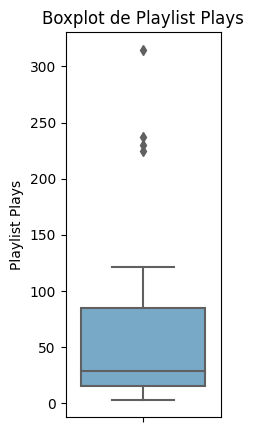

In [150]:
# Criando um gráfico de boxplot com Seaborn
plt.figure(figsize=(2, 5))
sns.boxplot(data=dataframe, y='Playlists Plays', palette='Blues')

# Adicionando rótulos e título
plt.ylabel('Playlist Plays')
plt.title('Boxplot de Playlist Plays')

# Exibindo o gráfico
plt.show()


### Artistas com mais de uma ocorrência no Set

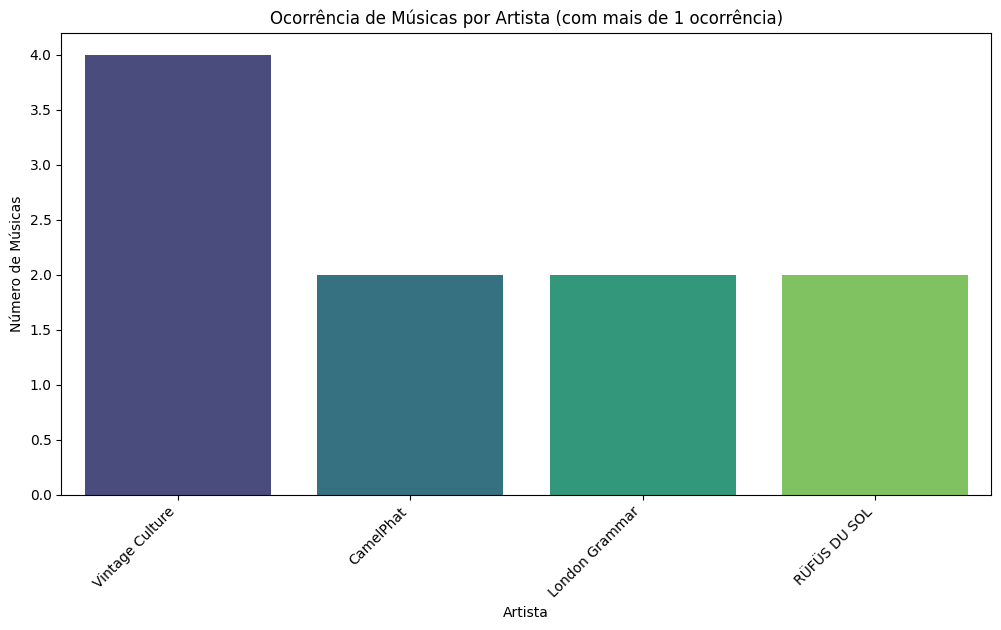

In [151]:
# Supondo que 'dataframe' seja o DataFrame que contém as informações das músicas
# 'Lista Artistas' é a coluna que contém as listas de artistas

# Explodindo a lista de artistas
df_exploded = dataframe.explode('Lista Artistas')

# Contando a ocorrência de músicas por artista
occurrences = df_exploded['Lista Artistas'].value_counts()

# Filtrando apenas artistas com mais de uma ocorrência
occurrences_filtered = occurrences[occurrences > 1]

# Criando um gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=occurrences_filtered.index, y=occurrences_filtered.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artista')
plt.ylabel('Número de Músicas')
plt.title('Ocorrência de Músicas por Artista (com mais de 1 ocorrência)')
plt.show()



,Artista,Artistas Originais,Remix,Artistas Remix,Lista Artistas,Nome,Label,Playlists Plays,Track Position,Group
0,Jamie Jones,[Jamie Jones],Vintage Culture Remix,[Vintage Culture],"[Jamie Jones, Vintage Culture]",My Paradise,DEFECTED,315.0,39,Remix
1,Andrew Meller,[Andrew Meller],NaN,[],[Andrew Meller],Born Slippy,GLASGOW UNDERGROUND,237.0,29,Not Remix
2,ANOTR & Abel Balder,"[ANOTR, Abel Balder]",NaN,[],"[ANOTR, Abel Balder]",Relax My Eyes,NO ART,230.0,28,Not Remix
3,Röyksopp,[Röyksopp],Maceo Plex Remix,[Maceo Plex],"[Röyksopp, Maceo Plex]",Sordid Affair,DOG TRIUMPH,225.0,42,Remix
4,Binary Finary,[Binary Finary],Victor Ruiz Remix,[Victor Ruiz],"[Binary Finary, Victor Ruiz]",1998,ARMADA,121.0,34,Remix
5,Pryda,[Pryda],NaN,[],[Pryda],Animal,PRYDA,112.0,47,Not Remix
6,Capricorn,[Capricorn],Marco Lys Remix,[Marco Lys],"[Capricorn, Marco Lys]",20Hz,R&S,112.0,30,Remix
7,RÜFÜS DU SOL,[RÜFÜS DU SOL],Yotto Remix,[Yotto],"[RÜFÜS DU SOL, Yotto]",Like An Animal,SWEAT IT OUT!,107.0,36,Remix
8,London Grammar & CamelPhat,"[London Grammar, CamelPhat]",NaN,[],"[London Grammar, CamelPhat]",Higher,MINISTRY OF SOUND,94.0,25,Not Remix
9,Stephan Bodzin & Marc Romboy,"[Stephan Bodzin, Marc Romboy]",Ben Böhmer Remix,[Ben Böhmer],"[Stephan Bodzin, Marc Romboy, Ben Böhmer]",Callisto,SYSTEMATIC,88.0,53,Remix


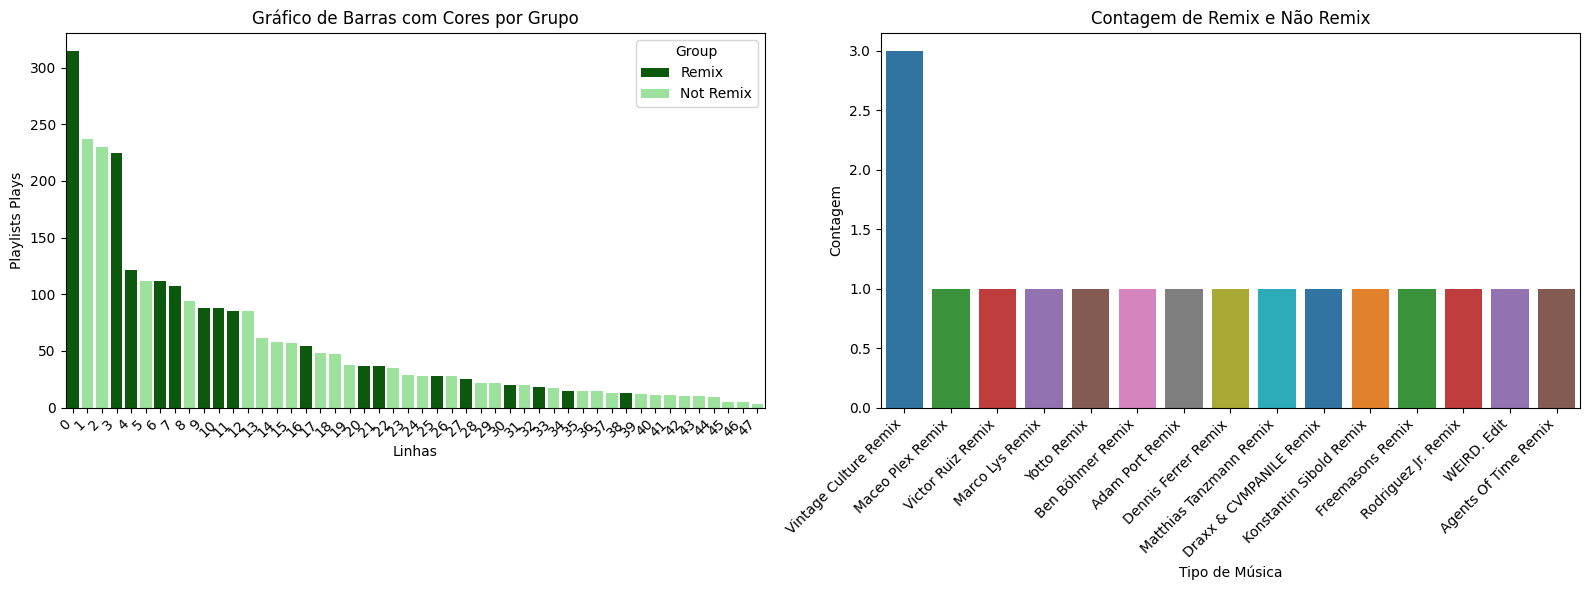

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supondo que 'dataframe' seja o DataFrame que contém as informações das músicas
# 'Playlists Plays' é a coluna que será usada para o gráfico de barras
# 'Remix' é a coluna categórica que indica se é remix ou não

# Adicionando uma coluna para indicar se o valor é NaN ou não
dataframe['Group'] = np.where(dataframe['Remix'].isna(), 'Not Remix', 'Remix')
display(dataframe.head(10))

# Criando um gráfico de barras com Seaborn
plt.figure(figsize=(16, 6))

# Subplot 1: Gráfico de Barras
plt.subplot(1, 2, 1)
sns.barplot(x=dataframe.index, y='Playlists Plays', hue='Group', data=dataframe, palette={'Not Remix': 'lightgreen', 'Remix': 'darkgreen'}, dodge=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Linhas')
plt.ylabel('Playlists Plays')
plt.title('Gráfico de Barras com Cores por Grupo')

# Subplot 2: Gráfico de Contagem
plt.subplot(1, 2, 2)
unique_values = dataframe['Remix'].unique()
palette = {value: f'C{i}' for i, value in enumerate(unique_values)}
sns.countplot(data=dataframe, x='Remix', palette=palette)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo de Música')
plt.ylabel('Contagem')
plt.title('Contagem de Remix e Não Remix')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()


### Gráfico de Pizza (Ocorrência de Remixes no Set)

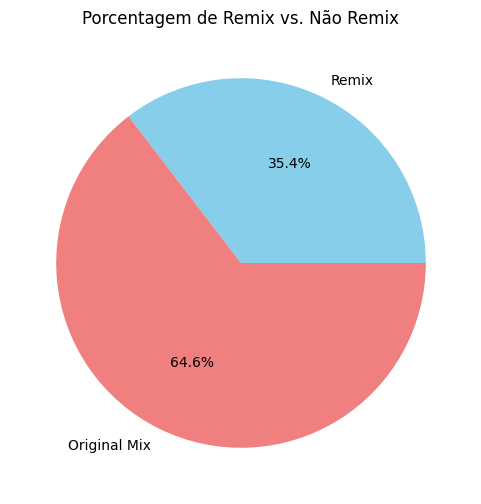

In [153]:
# Contar a ocorrência de valores na coluna 'Remix'
contagem_remix = dataframe['Remix'].notna().sum()
contagem_nao_remix = len(dataframe) - contagem_remix

# Criar uma lista de contagens
contagens = [contagem_remix, contagem_nao_remix]

# Rótulos para as categorias
rotulos = ['Remix', 'Original Mix']

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(contagens, labels=rotulos, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Porcentagem de Remix vs. Não Remix')
plt.show()


### Visualização em Barras do Set ordenado por Playlist Plays (Decresente)

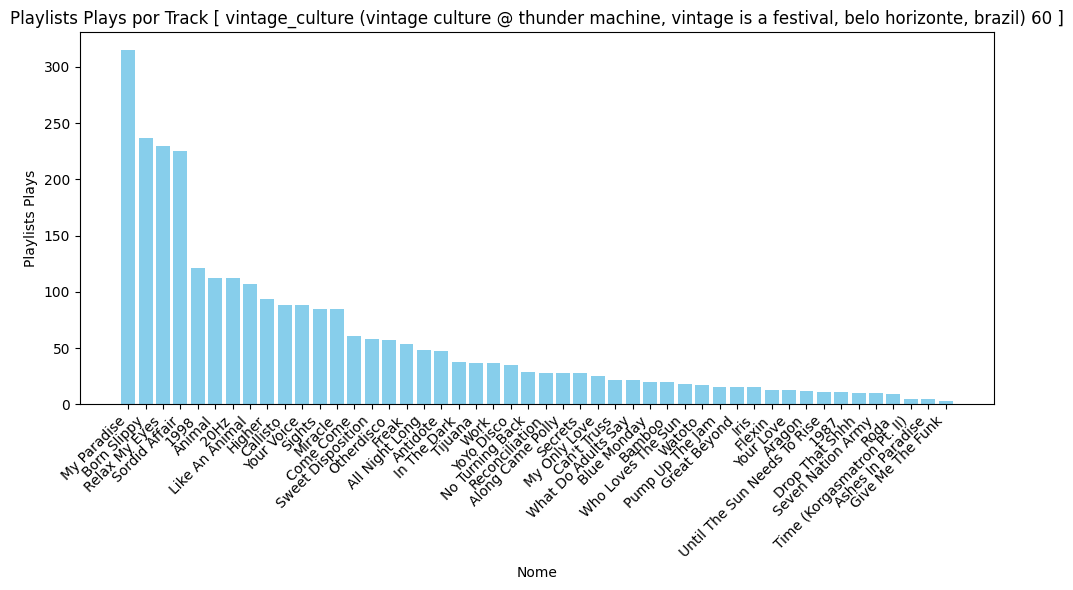

In [154]:
import matplotlib.pyplot as plt

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
plt.bar(dataframe['Nome'], dataframe['Playlists Plays'], color='skyblue')

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos e título
plt.xlabel('Nome')
plt.ylabel('Playlists Plays')
plt.title(f'Playlists Plays por Track [ {filename} ]')

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Determinação da quantidade de clusters para dividir as tracks por 'Playlists Plays'

C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

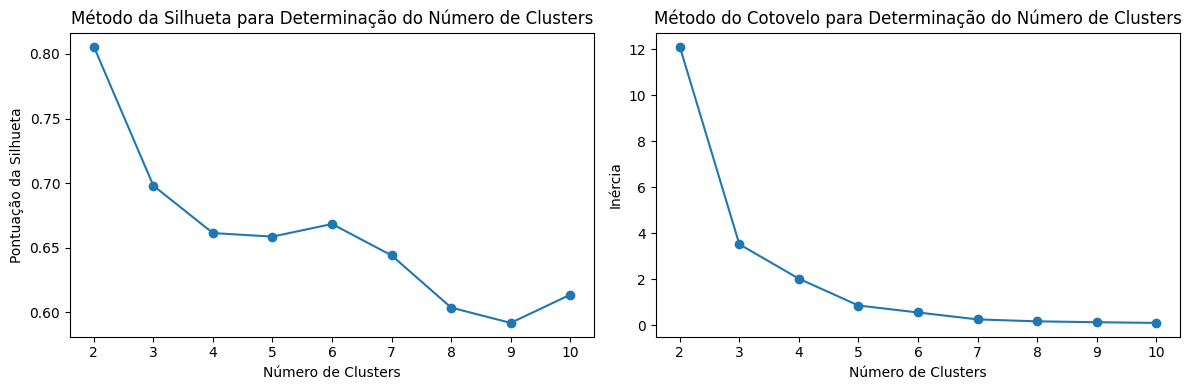

[0.8056379485954466, 0.698045797212977, 0.6614031295815411, 0.6586664898238787, 0.6684202320163637, 0.6441131263355019, 0.6037465873555395, 0.5918933903235346, 0.6137138017599435]
0.6606267225560807
Número escolhido de clusters (Cotovelo): 3


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Supondo que 'dataframe' seja o DataFrame que contém as informações das tracks
# 'Playlists Plays' é a coluna que será usada para a clusterização

# Selecionar as colunas relevantes para a clusterização
features = dataframe[['Playlists Plays']]

# Padronizar as features (importante para o K-means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Experimentar diferentes números de clusters e calcular a pontuação da silhueta e a inércia
silhouette_scores = []
inertia_values = []
numero_clusters_testados = range(2, 11)  # Experimentar de 2 a 10 clusters

for n_clusters in numero_clusters_testados:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    
    silhouette_avg = silhouette_score(features_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    
    inertia_values.append(kmeans.inertia_)

# Plotar o gráfico de pontuação da silhueta
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(numero_clusters_testados, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.title('Método da Silhueta para Determinação do Número de Clusters')

# Plotar o gráfico de cotovelo (elbow)
plt.subplot(1, 2, 2)
plt.plot(numero_clusters_testados, inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinação do Número de Clusters')

plt.tight_layout()
plt.show()

# Encontrar o número ideal de clusters com base no método do cotovelo
# (observar o ponto de inflexão)
numero_clusters_cotovelo = 3  # Altere conforme necessário

print(silhouette_scores)
print(np.mean(silhouette_scores))
print(f'Número escolhido de clusters (Cotovelo): {numero_clusters_cotovelo}')


### Gráfico de barras com clusters em cores diferentes

C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


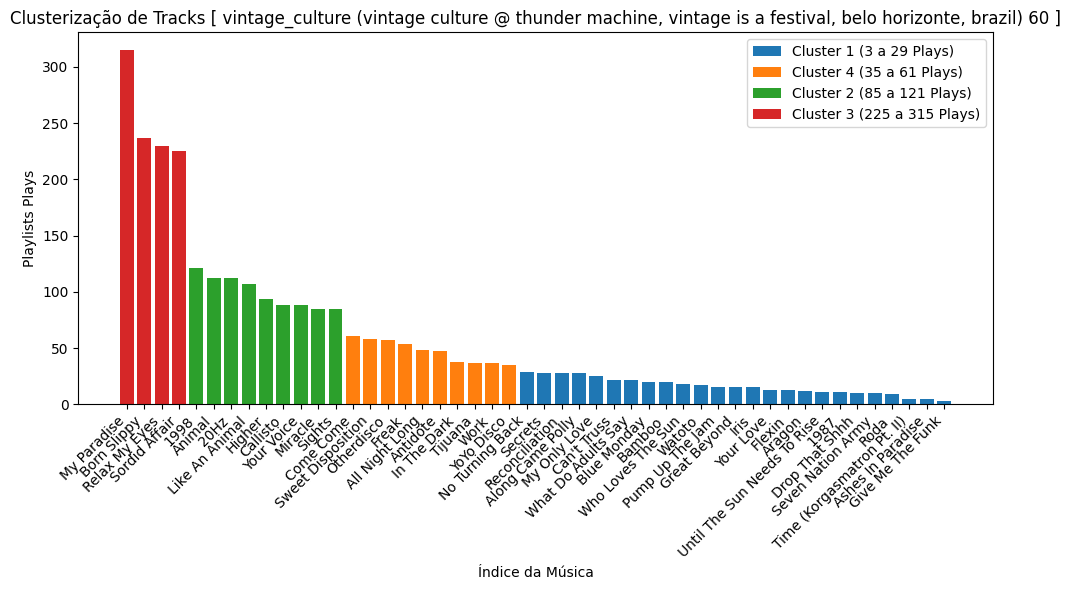

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Supondo que 'dataframe' seja o DataFrame que contém as informações das tracks
# 'Playlists Plays' é a coluna que será usada para a clusterização

# Selecionar as colunas relevantes para a clusterização
features = dataframe[['Playlists Plays']]

# Padronizar as features (importante para o K-means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Escolher o número de clusters (pode ser ajustado conforme necessário)
# n_clusters = numero_clusters_escolhido

n_clusters = 3

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
dataframe['Cluster'] = kmeans.fit_predict(features_scaled)

# Criar uma lista ordenada com os nomes das faixas
nomes_ordenados = list(dataframe.sort_values(by='Playlists Plays', ascending=False)['Nome'])

# Visualizar os clusters
plt.figure(figsize=(10, 6))

# Nomear automaticamente os clusters
nomes_clusters = []
for cluster in range(n_clusters):
    cluster_data = dataframe[dataframe['Cluster'] == cluster].sort_values(by='Playlists Plays', ascending=False)
    cluster_name = f'Cluster {cluster + 1} ({int(cluster_data["Playlists Plays"].min())} a {int(cluster_data["Playlists Plays"].max())} Plays)'
    nomes_clusters.append(cluster_name)

# Ordenar a lista de nomes dos clusters com base nos valores mínimos
nomes_clusters = sorted(nomes_clusters, key=lambda x: int(x.split('(')[1].split(' ')[0]))

for cluster_name in nomes_clusters:
    cluster_data = dataframe[dataframe['Cluster'] == int(cluster_name.split(' ')[1]) - 1].sort_values(by='Playlists Plays', ascending=False)
    plt.bar(cluster_data.index, cluster_data['Playlists Plays'], label=cluster_name)

# Adicionar rótulos e título
plt.xlabel('Índice da Música')
plt.ylabel('Playlists Plays')
plt.title(f'Clusterização de Tracks [ {filename} ]')
plt.xticks(ticks=dataframe.index, labels=nomes_ordenados, rotation=45, ha='right')  # Rótulos na vertical ou inclinados
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

# # Imprimir nomes dos clusters
# print("Nomes dos Clusters:")
# for nome_cluster in nomes_clusters:
#     print(nome_cluster)


### Histograma de ocorrências das 'Playlists Plays'

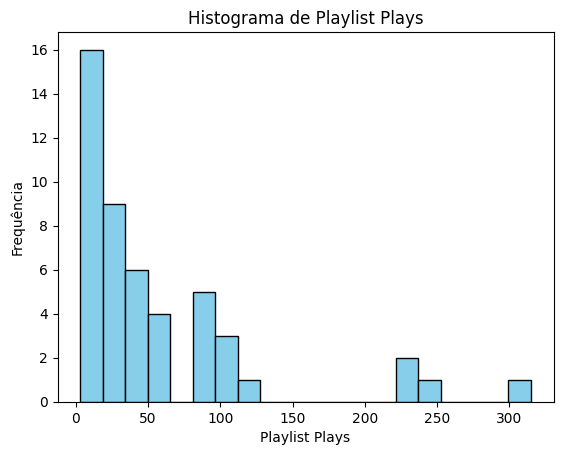

In [157]:
plt.hist(dataframe['Playlists Plays'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Playlist Plays')
plt.ylabel('Frequência')
plt.title('Histograma de Playlist Plays')
plt.show()


### Comparação entre sets DJs (nível de comercialidade)

Para poder ter menos sensibilidade a hits, e analisar o set como um todo, comparar a mediana ao invés da média.